In [1]:
from google.colab import files
uploaded = files.upload()

Saving Combined Data.csv to Combined Data.csv


In [2]:
import pandas as pd
df=pd.read_csv('Combined Data.csv',index_col=0)
df.head(10)

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
5,"every break, you must be nervous, like somethi...",Anxiety
6,"I feel scared, anxious, what can I do? And may...",Anxiety
7,Have you ever felt nervous but didn't know why?,Anxiety
8,"I haven't slept well for 2 days, it's like I'm...",Anxiety
9,"I'm really worried, I want to cry.",Anxiety


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [4]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


In [5]:
df.isna().sum()

,0
statement,362
status,0


In [6]:
df.dropna(inplace = True)
df.isna().sum()

,0
statement,0
status,0


In [7]:
df.status.value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


<Axes: title={'center': 'Distribution of Sentiments'}, xlabel='status'>

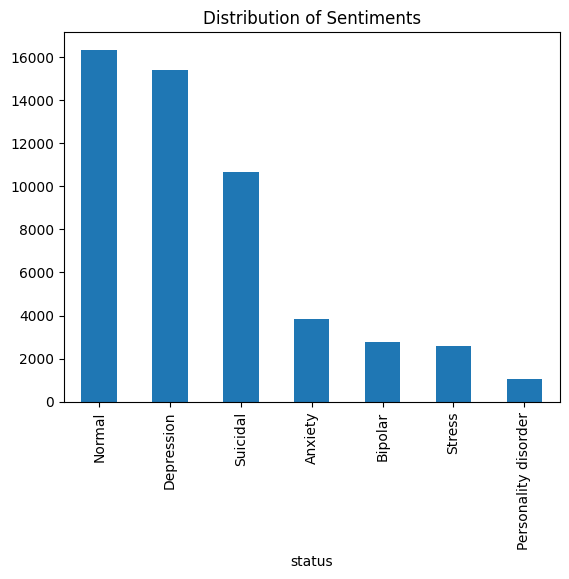

In [10]:
sentiment_counts=df['status'].value_counts()
sentiment_counts.plot(kind='bar', title='Distribution of Sentiments')

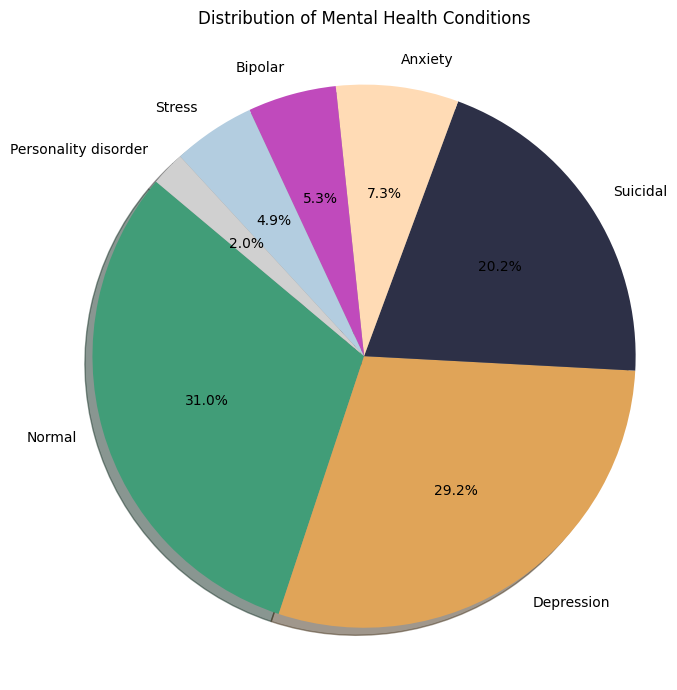

In [9]:
import matplotlib.pyplot as plt

status_counts = df['status'].value_counts()

colors = ['#419D78', '#E0A458', '#2D3047', '#FFDBB5', '#C04ABC', '#B3CDE0', '#D0D0D0']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')

# Display the chart
plt.tight_layout()
plt.show()

count    52681.000000
mean       578.713863
std        846.269078
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: statement_length, dtype: float64


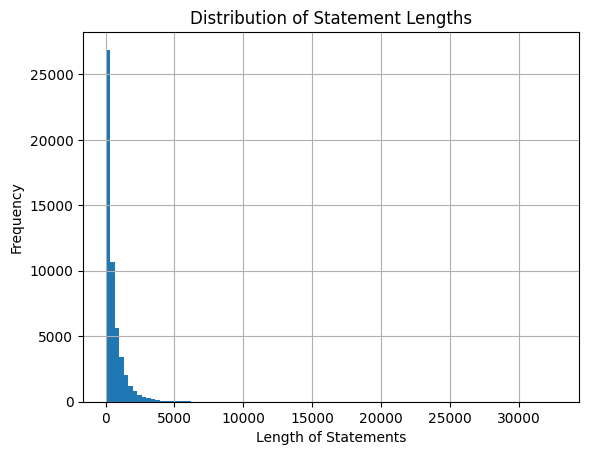

In [11]:
# Calculate the length of each statement
df['statement_length'] = df['statement'].apply(len)

# Display basic statistics of statement lengths
print(df['statement_length'].describe())

# Plot the distribution of statement lengths
df['statement_length'].hist(bins=100)
plt.title('Distribution of Statement Lengths')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

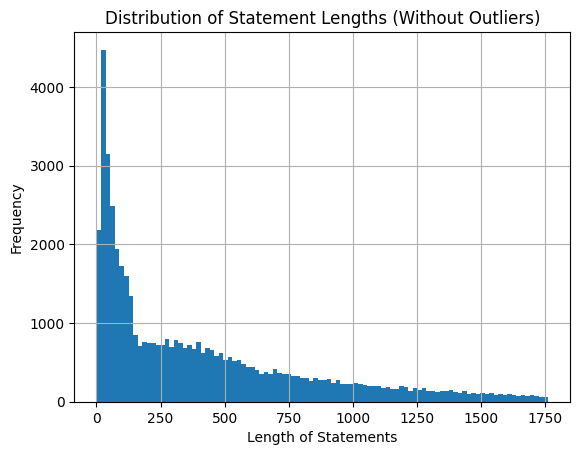

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['statement_length'].quantile(0.25)
Q3 = df['statement_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(df['statement_length'] >= lower_bound) & (df['statement_length'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['statement_length'].hist(bins=100)
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

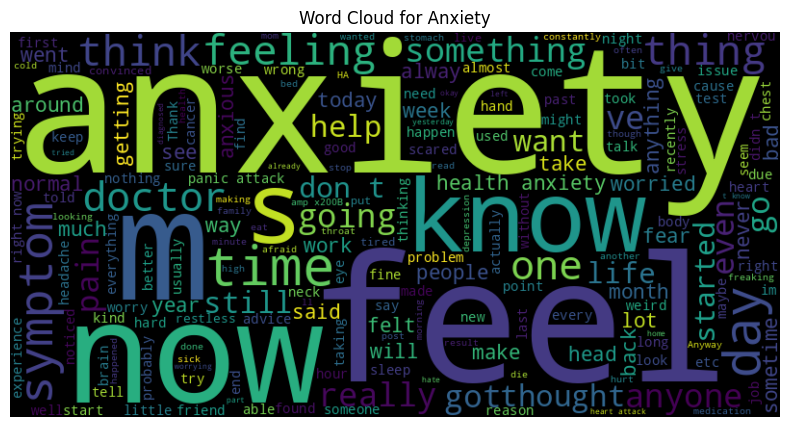

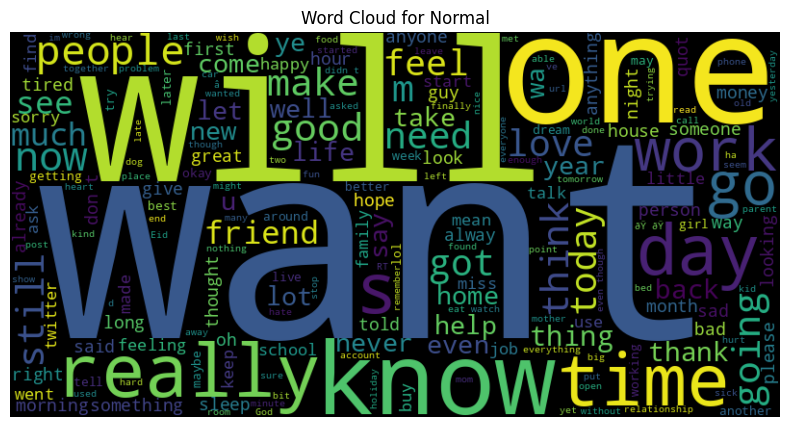

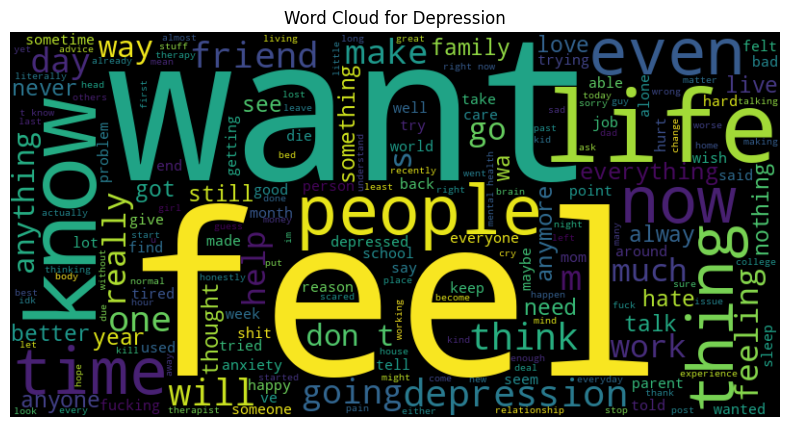

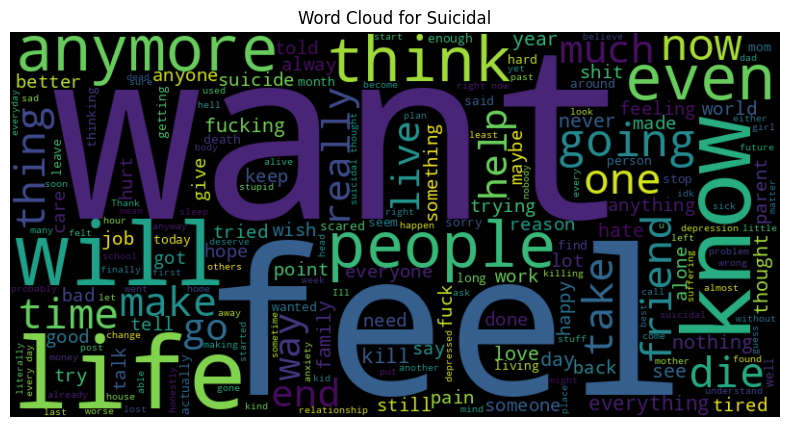

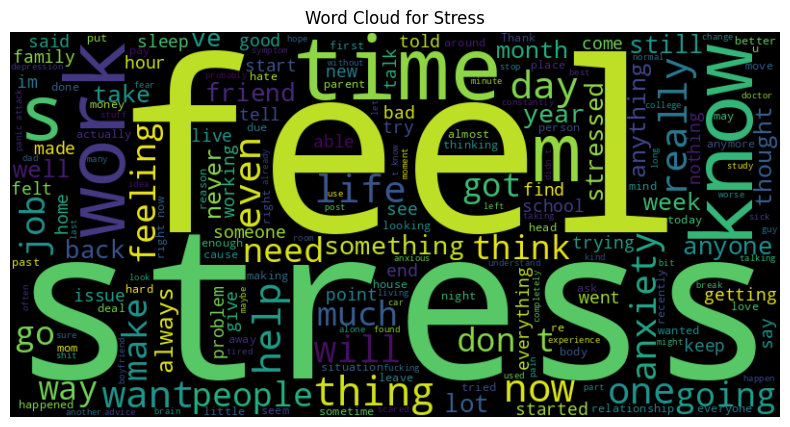

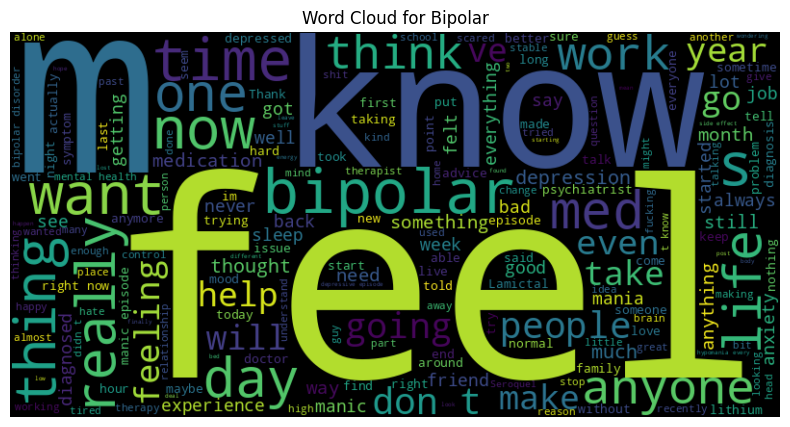

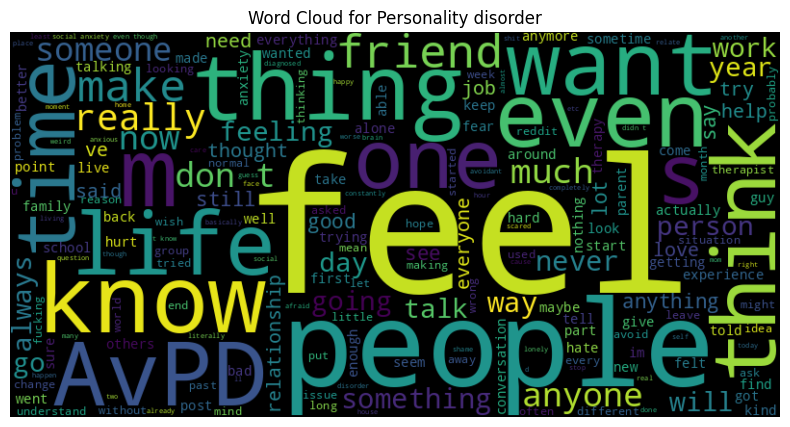

In [13]:
from wordcloud import WordCloud

# Create a function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each status
statuses = df['status'].unique()

for status in statuses:
    status_text = ' '.join(df[df['status'] == status]['statement'])
    generate_word_cloud(status_text, title=f'Word Cloud for {status}')

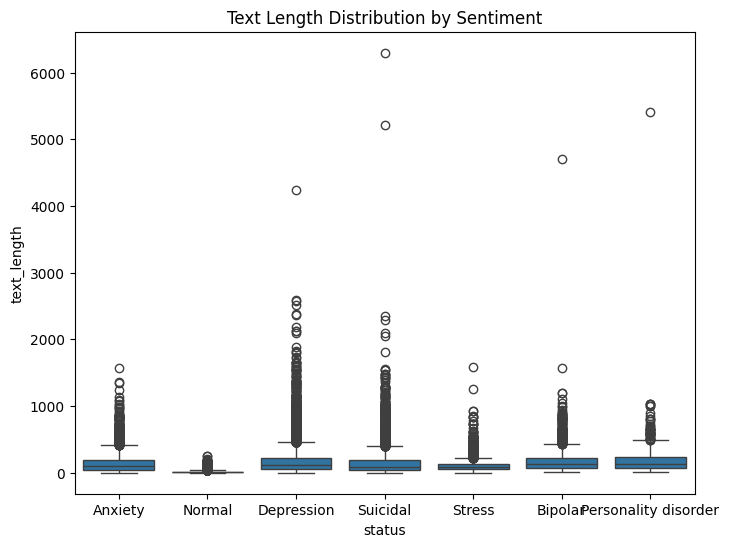

In [27]:
import seaborn as sns

# Fill NaN values in 'statement' column with empty string
df['statement'] = df['statement'].fillna('')

df['text_length'] = df['statement'].apply(lambda x: len(x.split()))

# Plot distribution of statement length for each status
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='text_length', data=df)
plt.title('Text Length Distribution by Sentiment')
plt.show()

From the above chart we can see there are some outlier statements with very long text lengths. A majority of statements are below 3,000. We can also see the Normal class has the shortest text lengths overall.

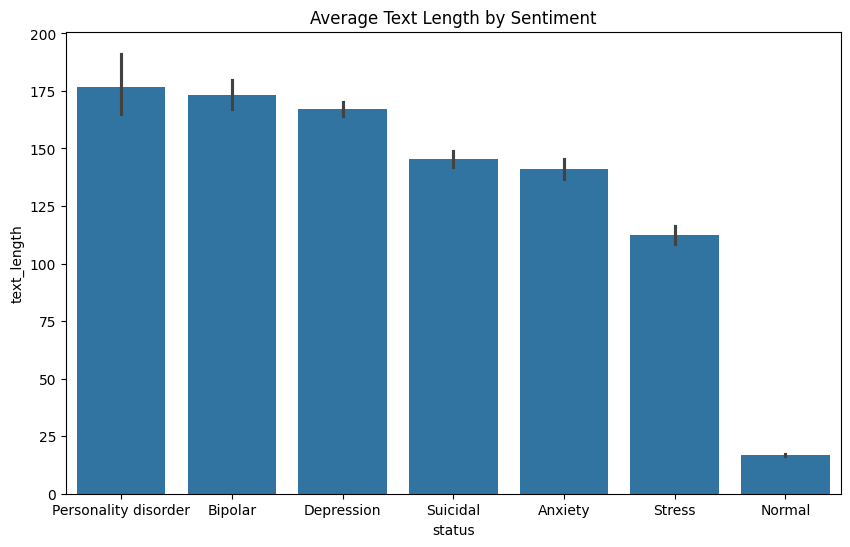

In [28]:
# Average length by status bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='text_length', data=df, order= df.groupby('status')['text_length'].mean().sort_values(ascending=False).index)
plt.title('Average Text Length by Sentiment')
plt.show()

From the above chart we can see the statements classified as Normal have the least average text length, while statement with mental health problems tend to have longer statements on average.

In [30]:
df.drop(['text_length'], axis=1, inplace=True)
df.head()

,statement,status,statement_length
0,oh my gosh,Anxiety,10
1,trouble sleeping confused mind restless heart ...,Anxiety,64
2,all wrong back off dear forward doubt stay in ...,Anxiety,78
3,ive shifted my focus to something else but im ...,Anxiety,61
4,im restless and restless its been a month now ...,Anxiety,72


In [34]:
max_count=df['status'].value_counts().max()
max_count

16343

In [36]:
from sklearn.utils import resample

def resmpl(df):
    max_count = df['status'].value_counts().max()

    df_resampled = pd.DataFrame()

    for status in df['status'].unique():
        df_class = df[df['status'] == status]
        if len(df_class) < max_count:
            df_class_resampled = resample(df_class,
                                          replace=True,
                                          n_samples=max_count,
                                          random_state=42)
            df_resampled = pd.concat([df_resampled, df_class_resampled])
        else:
            df_resampled = pd.concat([df_resampled, df_class])

    return df_resampled


df = resmpl(df)

In [37]:
df.sample(5)

,statement,status,statement_length
49567,new diagnoses i went for years thinking i had ...,Bipolar,1429
31934,why not,Normal,8
50007,is it normal that it makes you angry to be cal...,Bipolar,629
15740,literally fuck everything everything in this w...,Suicidal,522
21672,turning in a week i have been hes ily suicidal...,Depression,392


In [40]:
from nltk.stem import PorterStemmer
import re as r

pt=PorterStemmer()
def preprocessing(x):
    l=[]

    text=r.sub('[^a-zA-Z0-9\s]','',x.lower())
    for i in text.split():
        l.append(pt.stem(i.lower()))


    return " ".join(l)

In [41]:
df['statement']=df['statement'].apply(preprocessing)

In [42]:
x=df['statement']
y=df['status']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
x_train_tfidf=vec.fit_transform(x_train)
x_test_tfidf=vec.transform(x_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score

In [46]:
rf=RandomForestClassifier()
rf.fit(x_train_tfidf,y_train)

RandomForestClassifier()

In [47]:
ypred=rf.predict(x_test_tfidf)
ytr_pred=rf.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))

Test accuracy:  0.9510073860408199
Train accuracy:  0.9997159090909091
Precision Test accuracy:  0.9507478709318308
Precision Train accuracy:  0.9997160777516865


In [48]:
adb=AdaBoostClassifier()
adb.fit(x_train_tfidf,y_train)

AdaBoostClassifier()

In [49]:
ypred=adb.predict(x_test_tfidf)
ytr_pred=adb.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))

Test accuracy:  0.5512870940955378
Train accuracy:  0.5566761363636363
Precision Test accuracy:  0.5580328407050653
Precision Train accuracy:  0.5623859011595235


In [50]:
ext=ExtraTreesClassifier()
ext.fit(x_train_tfidf,y_train)

ExtraTreesClassifier()

In [51]:
ypred=ext.predict(x_test_tfidf)
ytr_pred=ext.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))

Test accuracy:  0.9520125868624623
Train accuracy:  0.9997159090909091
Precision Test accuracy:  0.9520801931801557
Precision Train accuracy:  0.9997160777516865


In [52]:
lr=LogisticRegression()
lr.fit(x_train_tfidf,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
ypred=lr.predict(x_test_tfidf)
ytr_pred=lr.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))

Test accuracy:  0.8725143131856126
Train accuracy:  0.9011582167832168
Precision Test accuracy:  0.8698899967609051
Precision Train accuracy:  0.8997623006970406


In [55]:
import joblib as j
j.dump(vec,'vecctorizer.pkl')
j.dump(rf,'model.pkl')

['model.pkl']

In [56]:
vector=j.load('vecctorizer.pkl')
model=j.load('model.pkl')

In [57]:
from nltk.stem import PorterStemmer
pt=PorterStemmer()
def preprocessing(x):
    l=[]

    text=r.sub('[^a-zA-Z0-9\s]','',x.lower())
    for i in text.split():
        l.append(pt.stem(i.lower()))




    return " ".join(l)

In [58]:
text="trouble sleeping, confused mind, restless heart. All out of tune"
text=preprocessing(text)

In [59]:
def predi(x):
    vec=vector.transform([text])
    result=model.predict(vec)[0]

    return result
predi(text)

'Anxiety'

In [60]:
text='It shows I have posted but I cannot find my post back here Am I not allowed to post here?'
text=preprocessing(text)

In [61]:
predi(text)

'Suicidal'

The model demonstrates strong performance in predicting mental health statuses such as Anxiety, Normal, Depression, Suicidal, Stress, Bipolar, and Personality Disorder.
This analysis shows the importance of data preprocessing and feature extraction using TF-IDF vectorization in achieving accurate results.
The high accuracy and precision scores of the model suggest that it can be a valuable tool in identifying mental health issues based on text input.